**train model with 200 classes is hard that why  i have taken first 2 class and train  a model got 94% accuracy after that i have taken 20 classes train a model get 75% accuray .**

In [ ]:
#!unzip /content/drive/MyDrive/archive.zip
!pip install livelossplot

In [41]:
from keras.utils.vis_utils import plot_model
import keras
import keras.backend as K
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils
import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from livelossplot import PlotLossesKeras

In [42]:
import pandas as pd
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

**prepair the data**

In [43]:

clas=[]
for i ,j, k in os.walk("/content/tiny-imagenet-200/train"):
  clas.append(j)
  break

In [44]:
path="/content/tiny-imagenet-200/train/"
c=0
data=[]
clas1=[]
for i in clas[0]:
  path1=path+str(i)
  for i ,j, k in os.walk(path1):
    for file in k:
      pat=os.path.join(i,file)
      data.append(pat)
      clas1.append(c)
  c=c+1


In [45]:
newdata=pd.DataFrame()
newdata["image"]=data
newdata["clas"]=clas1

**taking 2 and 20 classess first**

In [46]:
clas2=newdata[0:1000]
clas10=newdata[0:10000]



**first take class 2**

In [47]:
newdata=clas2
newdata

,image,clas
0,/content/tiny-imagenet-200/train/n02281406/n02...,0
1,/content/tiny-imagenet-200/train/n02281406/ima...,0
2,/content/tiny-imagenet-200/train/n02281406/ima...,0
3,/content/tiny-imagenet-200/train/n02281406/ima...,0
4,/content/tiny-imagenet-200/train/n02281406/ima...,0
...,...,...
995,/content/tiny-imagenet-200/train/n02814533/ima...,1
996,/content/tiny-imagenet-200/train/n02814533/ima...,1
997,/content/tiny-imagenet-200/train/n02814533/ima...,1
998,/content/tiny-imagenet-200/train/n02814533/ima...,1


In [48]:
#newdata = newdata.sample(frac =.50) 

In [49]:
#newdata=newdata.reset_index()


In [50]:
for j in range(0,len(newdata)):
  x=newdata["image"][j].split("/")
  x=str(x[5])
  if x.endswith(".txt"):
    newdata=newdata.drop(j)


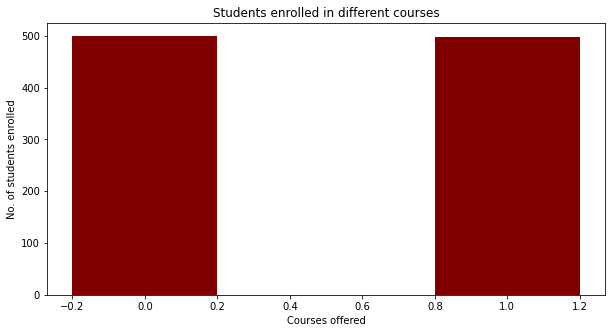

In [51]:
import numpy as np 
import matplotlib.pyplot as plt
import collections
data = newdata["clas"]
counter=collections.Counter(data)
courses = list(counter.keys()) 
height= list(counter.values())

#values = list(data.values()) 
fig = plt.figure(figsize = (10, 5)) 
plt.bar(courses,height ,color ='maroon', 
		width = 0.4) 

plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show() 


In [52]:
count=0
image1=[]
for i  in (newdata["image"]):
  try:
    image = cv2.imread(i)
    #cv2_imshow(image)
    image1.append(image)
  except:
    count=count+1
    print(count)

In [53]:
y=newdata["clas"]
y=np.array(y)
x=np.array(image1)

In [54]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

In [55]:
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

In [56]:

x1_train, x1_test, x2_train, x2_test=train_test_split(x,y,test_size=0.3)

In [57]:
print(x1_train.shape)
print(x1_test.shape)
print(x2_train.shape)
print(x2_test.shape)

(698, 64, 64, 3)
(300, 64, 64, 3)
(698, 2)
(300, 2)


In [58]:
x1_train=x1_train.reshape(x1_train.shape[0],64,64,3)
x1_test=x1_test.reshape(x1_test.shape[0],64,64,3)

In [59]:
x1_train=x1_train.astype('float32')
x2_train=x2_train.astype('float32')


In [60]:
x1_train=x1_train / 255.0
x2_train=x2_train /255
x1_test=x1_test /255
x2_test=x2_test /255

In [61]:

model = Sequential()
model.add(Conv2D(5,(1,1),padding="same", activation="relu", input_shape=(64,64,3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1000,activation="relu"))
model.add(Dense(2, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 5)         20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 5)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              20481000  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2002      
Total params: 20,483,022
Trainable params: 20,483,022
Non-trainable params: 0
_________________________________________________________________


In [62]:
opt = Adam(lr=0.00001)
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])

In [63]:
datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False,zca_whitening=False,
      rotation_range = 30,zoom_range = 0.2,width_shift_range=0.1,height_shift_range=0.1, horizontal_flip = True,vertical_flip=False)  

In [64]:
batch_size=50

class 2

In [65]:
model.fit_generator(datagen.flow(x1_train,x2_train, batch_size=batch_size),epochs=90,steps_per_epoch=x1_train.shape[0]//batch_size,validation_data=(x1_test, x2_test),validation_steps=x1_test.shape[0]//batch_size
                    ,callbacks=[PlotLossesKeras()])

**taking 20 classes**

In [66]:
newdata=clas10


In [67]:
for j in range(0,len(newdata)):
  x=newdata["image"][j].split("/")
  x=str(x[5])
  if x.endswith(".txt"):
    newdata=newdata.drop(j)

In [68]:
image11=64
image22=64

In [69]:
count=0
image2=[]
for i  in (newdata["image"]):
  try:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (image11,image22))
    #cv2_imshow(image)
    image2.append(image)
  except:
    count=count+1
    print(count)

In [70]:
y=newdata["clas"]
y=np.array(y)
x=np.array(image2)


In [71]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

In [72]:
x1_train, x1_test, x2_train, x2_test=train_test_split(x,y,test_size=0.3)

In [73]:
x1_train=x1_train.reshape(x1_train.shape[0],image11,image22,1)
x1_test=x1_test.reshape(x1_test.shape[0],image11,image22,1)

In [74]:
x1_train=x1_train.astype('float32')
x2_train=x2_train.astype('float32')

In [75]:
x1_train=x1_train / 255.0
x2_train=x2_train /255
x1_test=x1_test /255
x2_test=x2_test /255

In [76]:
model = Sequential()
model.add(Conv2D(100,(1,1),padding="same", activation="relu", input_shape=(image11,image22,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(256, (1,1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(375, (1,1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(400, (1,1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(450, (1,1), padding="same", activation="relu"))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(20, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 100)       200       
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 100)       400       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 100)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)       25856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 375)      

In [77]:
opt = Adam(lr=0.00001)
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])

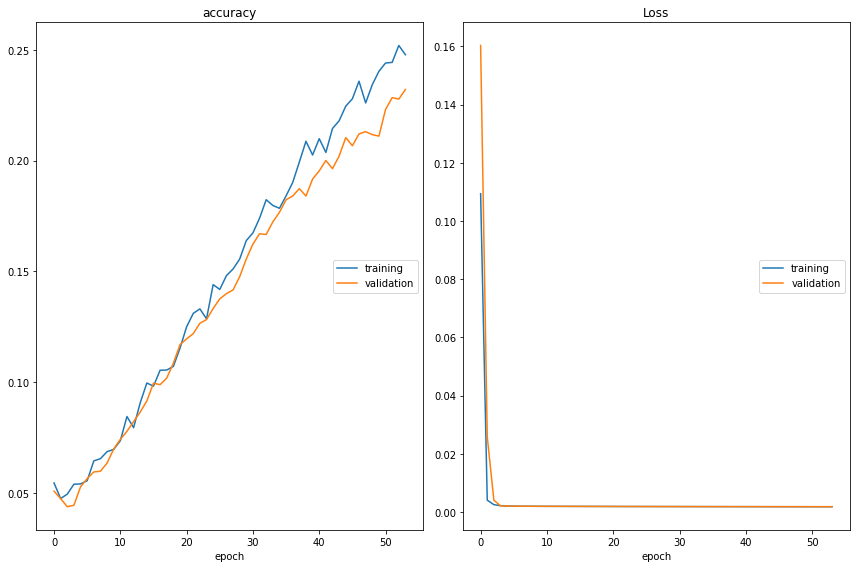

accuracy
	training         	 (min:    0.047, max:    0.252, cur:    0.248)
	validation       	 (min:    0.044, max:    0.232, cur:    0.232)
Loss
	training         	 (min:    0.002, max:    0.109, cur:    0.002)
	validation       	 (min:    0.002, max:    0.160, cur:    0.002)
Epoch 55/200
 83/139 [================>.............] - ETA: 1s - loss: 0.0018 - accuracy: 0.2521

In [ ]:
model.fit_generator(datagen.flow(x1_train,x2_train, batch_size=50), 
                    epochs=200,
                    steps_per_epoch=x1_train.shape[0]//batch_size, 
                    validation_data=(x1_test, x2_test),
                    validation_steps=x1_test.shape[0]//batch_size
                    ,callbacks=[PlotLossesKeras()])